In [67]:
import matplotlib.pyplot as plt
import numpy as np

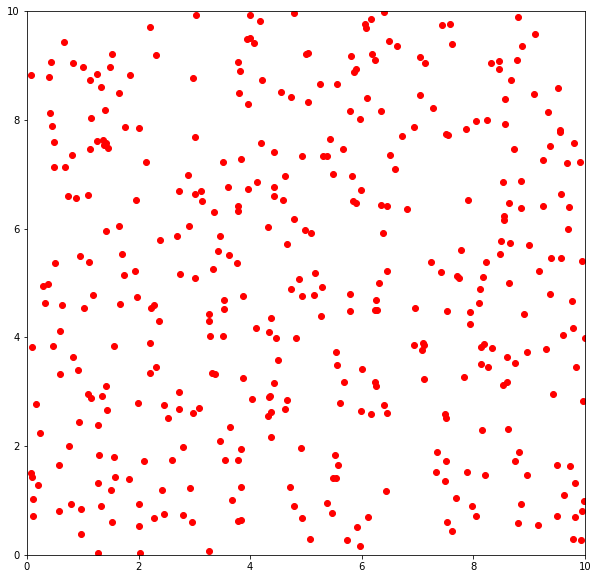

In [68]:
num = 400
delta = 1 / num
d = 0.1
dot_mat = np.zeros((2, num))
# 测试Y型即可
for t in range(num):
    x = np.random.uniform(0, 10)
    y = np.random.uniform(0, 10)
    dot_mat[0][t] = x
    dot_mat[1][t] = y
plt.figure(figsize=(10, 10))
plt.xlim((0, 10))
plt.ylim((0, 10))
for t in range(num):
    plt.scatter(dot_mat[0][t], dot_mat[1][t], c='red')
plt.show()

In [69]:
def dst(x1, x2, y1, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


rc = 1

In [70]:
N_list = []
# eq9
for t in range(num):
    Nq_list = [[], [], [], []]
    for i in range(num):
        if dst(dot_mat[0][t], dot_mat[0][i], dot_mat[1][t], dot_mat[1][i]) <= rc:
            flag = 0
            if dot_mat[0][t] < dot_mat[0][i]:
                if dot_mat[1][t] <= dot_mat[1][i]:
                    flag = 0
                else:
                    flag = 3
            else:
                if dot_mat[1][t] <= dot_mat[1][i]:
                    flag = 1
                else:
                    flag = 2
            Nq_list[flag].append(np.array((dot_mat[1][t], dot_mat[1][i])))
    N_list.append(Nq_list)
# eq10
N_hat_list = []
for n in N_list:
    Nq_hat_list = []
    for m in n:
        temp_list = []
        temp_max = 0
        for t in m:
            if t[0] ** 2 + t[1] ** 2 > temp_max:
                temp_max = t[0] ** 2 + t[1] ** 2
        for t in m:
            if -0.001 < t[0] ** 2 + t[1] ** 2 - temp_max < 0.001:
                temp_list.append(t)
        Nq_hat_list.append(temp_list)
    N_hat_list.append(Nq_hat_list)
#eq11
Tq_mat = np.zeros((num, 5))
for i, n in enumerate(N_hat_list):
    n_sum = 0
    for j, m in enumerate(n):
        if len(m) == 0:
            Tq_mat[i][j] = 0
        else:
            Tq_mat[i][j] = 1
            n_sum += 1
    Tq_mat[i][4] = n_sum
#eq12
Ni_hat_list = []
for i, t in enumerate(Tq_mat):
    Ni_hat_temp = []
    if t[4] == 1:
        for j in range(4):
            if t[j] == 1:
                num = len(N_hat_list[i][j])
                index = np.random.randint(0, num)
                Ni_hat_temp.append(N_hat_list[i][j][index])
    if t[4] >= 3:
        for j in range(4):
            if t[j] == 1:
                num = len(N_hat_list[i][j])
                index = np.random.randint(0, num)
                Ni_hat_temp.append(N_hat_list[i][j][index])

    if t[4] == 2:
        a_mat = t[:4] * np.array([1, -1, 1, -1])
        if np.array_equal(a_mat, np.array([0, 0, 0, 0])):
            flag = 0
            for j in range(4):
                if t[j] == 1:
                    flag = j
                    break
            # 1,2
            if flag == 0:
                # 此处为了方便这样写，如果坐标大于100需要更改
                x1 = np.array((100, 0))
                x2 = np.array((100, 0))
                for n in N_hat_list[i][0]:
                    if n[0] < x1[0]: x1 = n
                Ni_hat_temp.append(x1)
                for n in N_hat_list[i][1]:
                    if n[0] < x2[0]: x2 = n
                Ni_hat_temp.append(x2)
            # 2,3
            if flag == 1:
                x2 = np.array((0, 0))
                x3 = np.array((0, 0))
                for n in N_hat_list[i][1]:
                    if n[0] > x2[0]: x2 = n
                Ni_hat_temp.append(x2)
                for n in N_hat_list[i][2]:
                    if n[0] < x3[0]: x3 = n
                Ni_hat_temp.append(x3)
            # 3,4
            if flag == 2:
                x3 = np.array((-100, 0))
                x4 = np.array((-100, 0))
                for n in N_hat_list[i][2]:
                    if n[0] > x3[0]: x3 = n
                Ni_hat_temp.append(x3)
                for n in N_hat_list[i][3]:
                    if n[0] > x4[0]: x4 = n
                Ni_hat_temp.append(x4)
            # 4,1
            if flag == 3:
                x4 = np.array((0, 0))
                x1 = np.array((0, 0))
                for n in N_hat_list[i][3]:
                    if n[0] < x4[0]: x4 = n
                Ni_hat_temp.append(x4)
                for n in N_hat_list[i][0]:
                    if n[0] > x1[0]: x1 = n
                Ni_hat_temp.append(x1)
        else:
            for j in range(4):
                if t[j] == 1:
                    num = len(N_hat_list[i][j])
                    index = np.random.randint(0, num)
                    Ni_hat_temp.append(N_hat_list[i][j][index])
    Ni_hat_list.append(Ni_hat_temp)